<a href="https://colab.research.google.com/github/Utkarshmishra2k2/GDP-Prediction/blob/main/GDP_of_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

#Data Loading and Cleaning

In [2]:
data_01 = pd.read_csv( "https://raw.githubusercontent.com/UM1412/Data-Set/main/GDP%20Data.csv" )

In [3]:
data_01.head(3)

,1960,36535925031
0,1961,3.870910e+10
1,1962,4.159907e+10
2,1963,4.777600e+10


In [4]:
data_01.columns=["Year","GDP"]

In [5]:
data_01.head(3)

,Year,GDP
0,1961,3.870910e+10
1,1962,4.159907e+10
2,1963,4.777600e+10


In [6]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    57 non-null     int64  
 1   GDP     57 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [7]:
data_01.describe()

,Year,GDP
count,57.000000,5.700000e+01
mean,1989.000000,5.547653e+11
std,16.598193,6.736284e+11
min,1961.000000,3.870910e+10
25%,1975.000000,9.819828e+10
50%,1989.000000,2.760000e+11
75%,2003.000000,6.000000e+11
max,2017.000000,2.600000e+12


In [8]:
data_01.shape

(57, 2)

#Exploratory Analysis

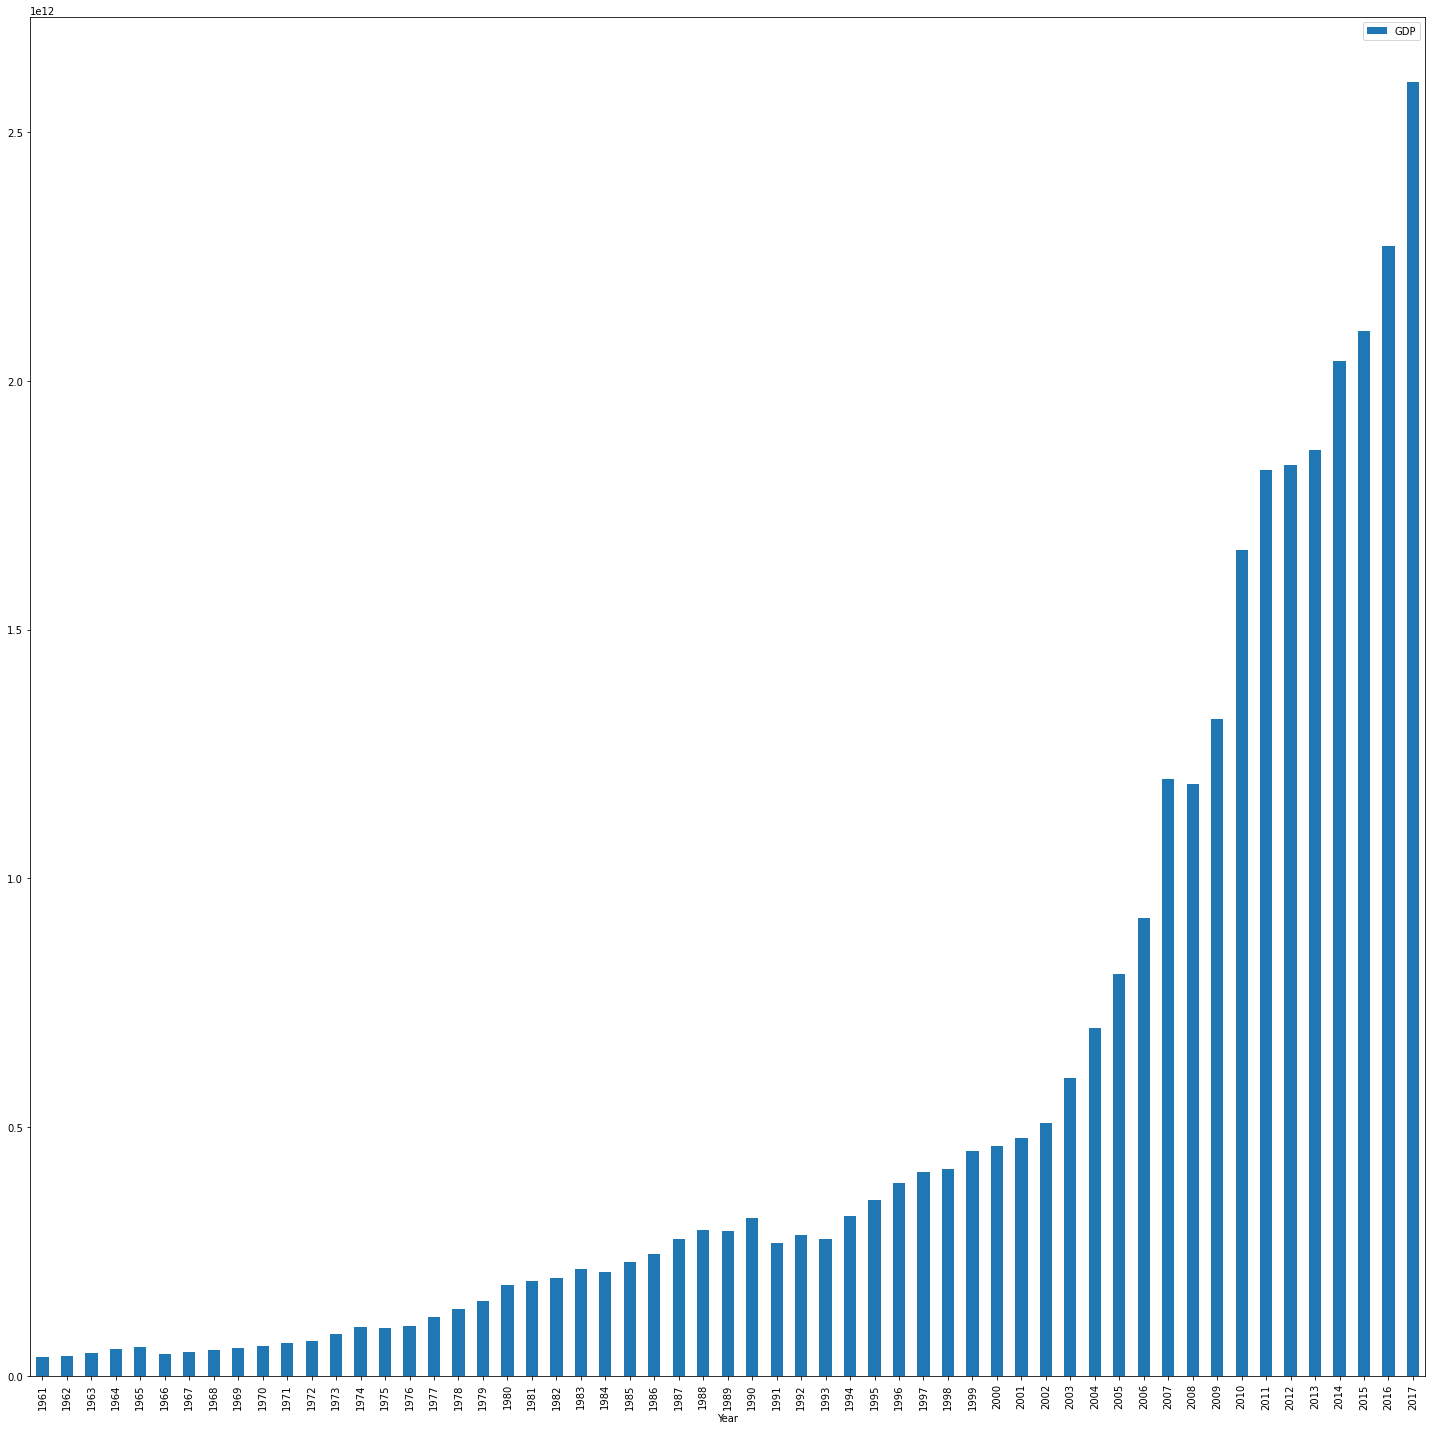

In [9]:
data_01.plot("Year","GDP",kind="bar",figsize=(25,25));

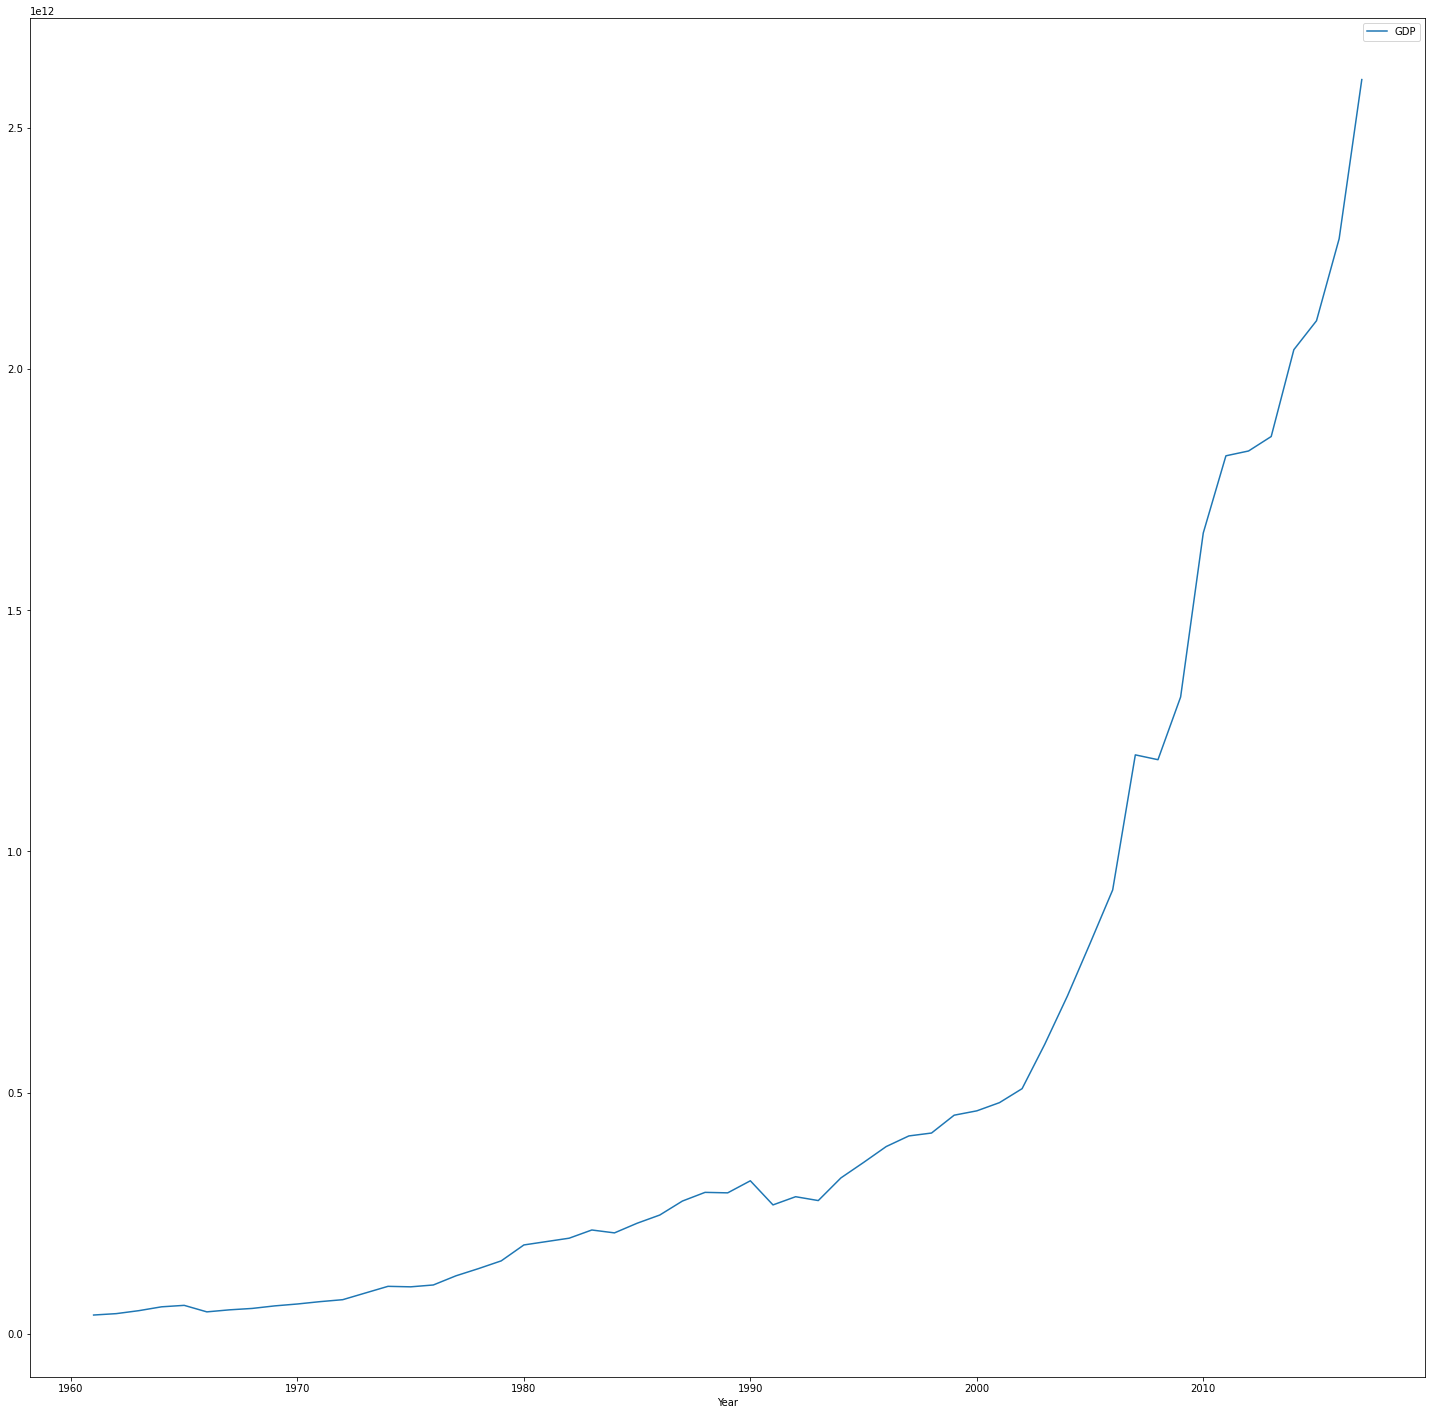

In [10]:
data_01.plot("Year","GDP",kind="line",figsize=(25,25));

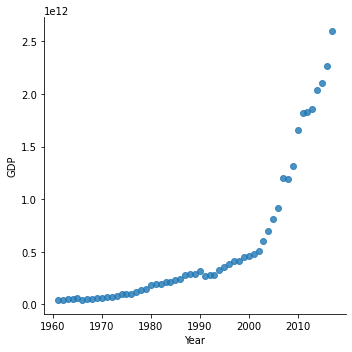

In [11]:
sns.lmplot ( x = "Year" , y = "GDP" , data=data_01 , fit_reg=False );

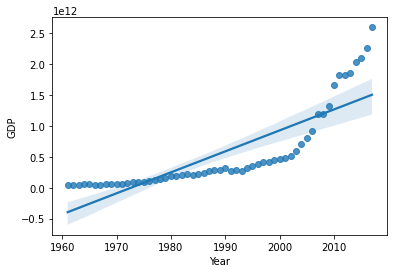

In [12]:
sns.regplot ( x = "Year" , y = "GDP" , data=data_01 );

#Creating Model

In [13]:
traindata , testdata = train_test_split ( data_01 )

In [14]:
traindata

,Year,GDP
29,1990,3.170000e+11
53,2014,2.040000e+12
11,1972,7.050991e+10
17,1978,1.350000e+11
30,1991,2.670000e+11
21,1982,1.980000e+11
25,1986,2.460000e+11
6,1967,4.946617e+10
46,2007,1.200000e+12
0,1961,3.870910e+10


In [15]:
testdata

,Year,GDP
18,1979,1.510000e+11
4,1965,5.876042e+10
9,1970,6.158980e+10
38,1999,4.530000e+11
23,1984,2.090000e+11
5,1966,4.525364e+10
26,1987,2.750000e+11
36,1997,4.100000e+11
42,2003,6.000000e+11
28,1989,2.920000e+11


#Linear Regression

In [16]:
model_01 = LinearRegression().fit(traindata.iloc[:,:1],traindata.iloc[:,1:])

In [17]:
y = model_01.predict( testdata.iloc[:,:1] )

In [18]:
mean_squared_error ( testdata.iloc[:,:1] , y )

5.9297254859334117e+23

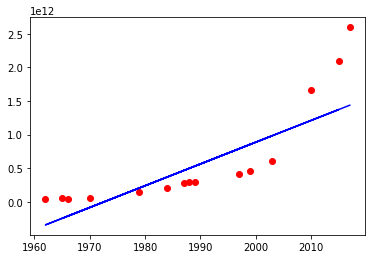

In [19]:
plt.plot(testdata["Year"],testdata["GDP"],"ro")
plt.plot(testdata["Year"],y,"b-")
plt.show()


#Decision Tree Regression

In [20]:
model_02 = DecisionTreeRegressor().fit ( traindata.iloc[:,:1] , traindata.iloc[:,1:] )

In [21]:
y_02=model_02.predict(testdata.iloc[:,:1])

In [22]:
mean_squared_error(testdata.iloc[:,:1],y_02)

7.956607588884016e+23

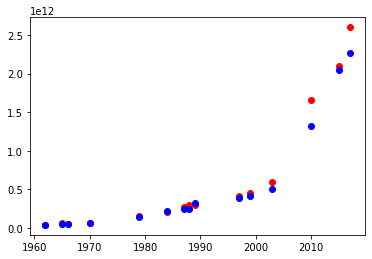

In [23]:
plt.plot(testdata["Year"],testdata["GDP"],'ro')
plt.plot(testdata["Year"],y_02,'bo')
plt.show()

#Lasso Regression 

In [24]:
model_03 = Lasso(alpha=10).fit( traindata.iloc[:,:1] , traindata.iloc[:,1:] )

In [25]:
y_03 = model_03.predict( testdata.iloc[:,:1] )

In [26]:
mean_squared_error( testdata.iloc[:,:1] , y_03 )

5.9297254859258706e+23

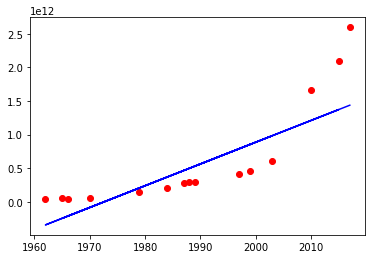

In [27]:
plt.plot(testdata["Year"],testdata["GDP"],'ro')
plt.plot(testdata["Year"],y_03,'b-')
plt.show()

#Ridge Regression

In [28]:
model_04 = Ridge(alpha=1).fit( traindata.iloc[:,:1],traindata.iloc[:,1:] )

In [29]:
y_04 = model_04.predict( testdata.iloc[:,:1] )

In [30]:
mean_squared_error( testdata.iloc[:,:1],y_04 )

5.9291435384977937e+23

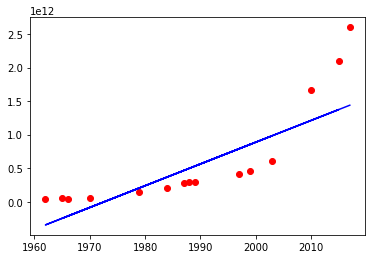

In [31]:
plt.plot(testdata["Year"],testdata["GDP"],'ro')
plt.plot(testdata["Year"],y_04,'b-')
plt.show()

#RandomForestRegressor

In [32]:
model_05 = RandomForestRegressor().fit( traindata.iloc[:,:1],traindata.iloc[:,1:] )

<ipython-input-32-a56cc32c28eb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_05 = RandomForestRegressor().fit( traindata.iloc[:,:1],traindata.iloc[:,1:] )


In [33]:
y_05 = model_05.predict(testdata.iloc[:,:1])

In [34]:
mean_squared_error(testdata.iloc[:,:1],y_05)

8.057598562851797e+23

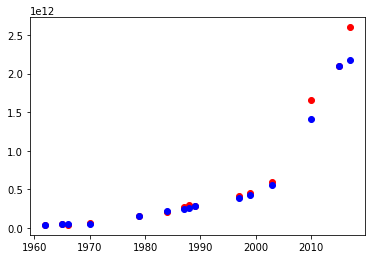

In [35]:
plt.plot(testdata["Year"],testdata["GDP"],'ro')
plt.plot(testdata["Year"],y_05,'bo')
plt.show()